Housing price prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
data = pd.read_csv("/content/Boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.shape

(506, 14)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df_lfeat = data[["LSTAT", "MEDV"]]
df_lfeat

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


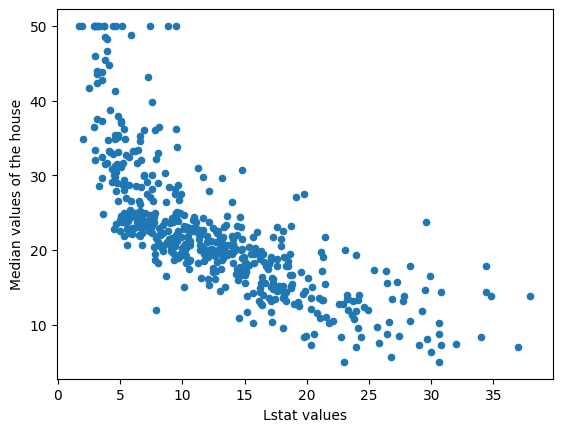

In [ ]:
df_lfeat.plot(kind='scatter',x = 'LSTAT', y = 'MEDV')
plt.xlabel("Lstat values")
plt.ylabel("Median values of the house")
plt.show()

In [ ]:
x = pd.DataFrame(df_lfeat[['LSTAT']])
y = pd.DataFrame(df_lfeat[['MEDV']])

In [ ]:
# Split the data for train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size= 0.2 , random_state=42 )

In [ ]:
print(f"X train shape is: {x_train.shape}")
print(f"y train shape is: {y_train.shape}")
print("*"*30)
print(f"X test shape is: {x_test.shape}")
print(f"y test shape is: {y_test.shape}")

X train shape is: (404, 1)
y train shape is: (404, 1)
******************************
X test shape is: (102, 1)
y test shape is: (102, 1)


Create the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

Fit the model

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

Y=mX+c

m = coefficient (coef_)

c = intercept (intercept_)

Coefficient	>>>
Positive (+)	X বাড়লে Y বাড়ে
Negative (-)	X বাড়লে Y কমে

In [ ]:

print(model.coef_)

[[-0.9665309]]


In [ ]:
print(model.intercept_)

[34.83694982]


Predictions

In [ ]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [ ]:
y_pred.size

102

In [ ]:
y_pred

,Predicted
0,26.099510
1,31.425096
2,17.371736
3,29.501699
4,18.144961
...,...
97,1.617283
98,17.391067
99,14.327164
100,22.407362


In [ ]:
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [ ]:

print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")


MAE: 4.184807930623362
MSE: 33.51954917268489
RMSE: 5.789606996393182


Multiple linear Regression

In [ ]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [ ]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [ ]:
# Split the data for train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size= 0.2 , random_state=42 )

In [ ]:
print(f"X train shape is: {x_train.shape}")
print(f"y train shape is: {y_train.shape}")
print("*"*30)
print(f"X test shape is: {x_test.shape}")
print(f"y test shape is: {y_test.shape}")

X train shape is: (404, 13)
y train shape is: (404, 1)
******************************
X test shape is: (102, 13)
y test shape is: (102, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

array([30.24675099])

In [ ]:
model.coef_

array([[-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,
         2.78443820e+00, -1.72026334e+01,  4.43883520e+00,
        -6.29636221e-03, -1.44786537e+00,  2.62429736e-01,
        -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]])

In [ ]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [ ]:
y_pred

,Predicted
0,28.996724
1,36.025565
2,14.816944
3,25.031979
4,18.769880
...,...
97,-0.164237
98,13.684867
99,16.183597
100,22.276220


In [ ]:
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")


MAE: 3.1890919658878016
MSE: 24.29111947497323
RMSE: 4.9286021826653075
